# Amazon Bedrock AgentCore Observability: Enable Transaction Search
This notebook demonstrates how to enable Transactioin Search for enhanced observability in Amazon Bedrock AgentCore. [Transaction Search](https://docs.aws.amazon.com/AmazonCloudWatch/latest/monitoring/CloudWatch-Transaction-Search.html) is an interactive analytics experience you can use to get complete visibility of your application transaction spans. Spans are the fundamental units of operation in a distributed trace and represent specific actions or tasks in an application or system. Every span records details about a particular segment of the transaction. These details include start and end times, duration, and associated metadata, which can include business attributes like customer IDs and order IDs. Spans are arranged in a parent-child hierarchy. This hierarchy forms a complete trace, mapping the flow of a transaction across different components or services.

You can enable Transaction Search through the console or by using an API or by using AWS CloudFormation. Transaction search is configured for the entire account and switches all spans ingestion through X-Ray into cost effective collection mode using [Amazon CloudWatch Pricing](https://aws.amazon.com/cloudwatch/pricing/). By default you will also index 1% of ingested spans for free as trace summary for analysis, which is typically sufficient given you already have full end-to-end trace visibility on all ingested spans through Transaction Search.

# What you'll learn
- How to enable Transaction Search using AWS CloudFormation

# Prerequisites
- Grant appropriate permissions to the 'SageMaker Execution Role' to run CLI commands, create CloudFormation stack and enable Trasaction Search as per the [documentation](https://docs.aws.amazon.com/IAM/latest/UserGuide/id_roles_update-role-permissions.html)
- Make sure Transaction Search is disabled before you enable using AWS CloudFormation.

# 1. Setup and configuration

Run the below code to get the current user and make sure this role has appropriate permissions as indicated in the Prerequisites.




In [ ]:
!aws sts get-caller-identity

To enable Transaction Search using CloudFormation, you need to create the following two resources.

- AWS::Logs::ResourcePolicy
- AWS::XRay::TransactionSearchConfig

Sample [cloudFormation template](transaction_search.yml) is provided in the project folder and review/update as per your needs. Run the below code to create resource policy and enable transaction search that allows X-Ray to send traces to CloudWatch Logs

In [ ]:
!aws cloudformation create-stack --stack-name transaction-search --template-body file://transaction_search.yml

Enabling transaction search takes 5 to 10 minutes. Wait until the stack creation is complete with status `CREATE_COMPLETE` and you can use below code to check the status

In [ ]:
!aws cloudformation describe-stacks --stack-name transaction-search --query 'Stacks[0].StackStatus' --output text


# 2. Verify configuration

After deploying your AWS CloudFormation stack, you can verify the configuration using the below code. A successful configuration will return Destination as 'CloudWatchLogs' and Status as 'ACTIVE'.



In [ ]:
!aws xray get-trace-segment-destination


You can also verify from the CloudWatch console as below:

- Before enabling Transaction Search:


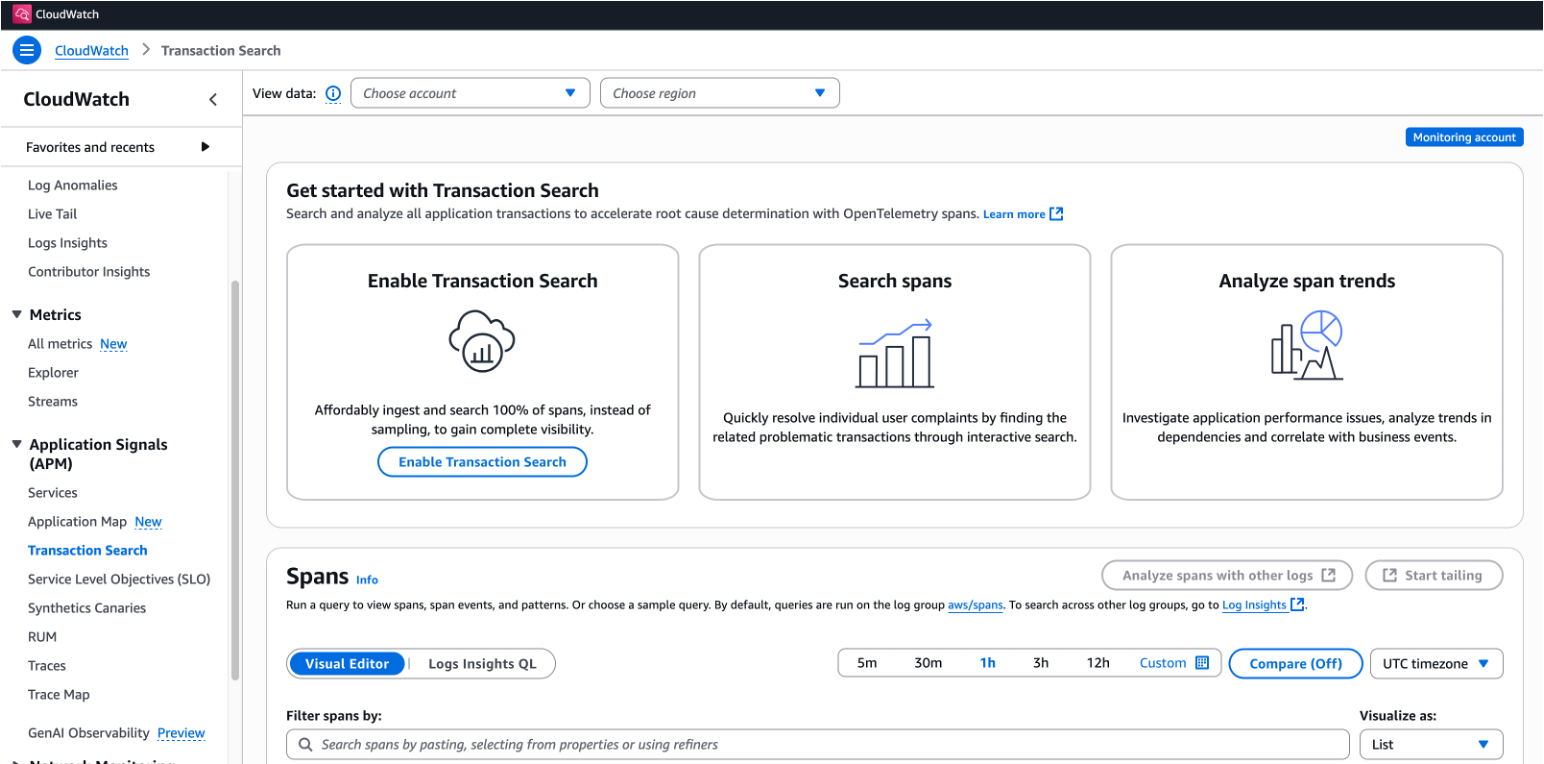


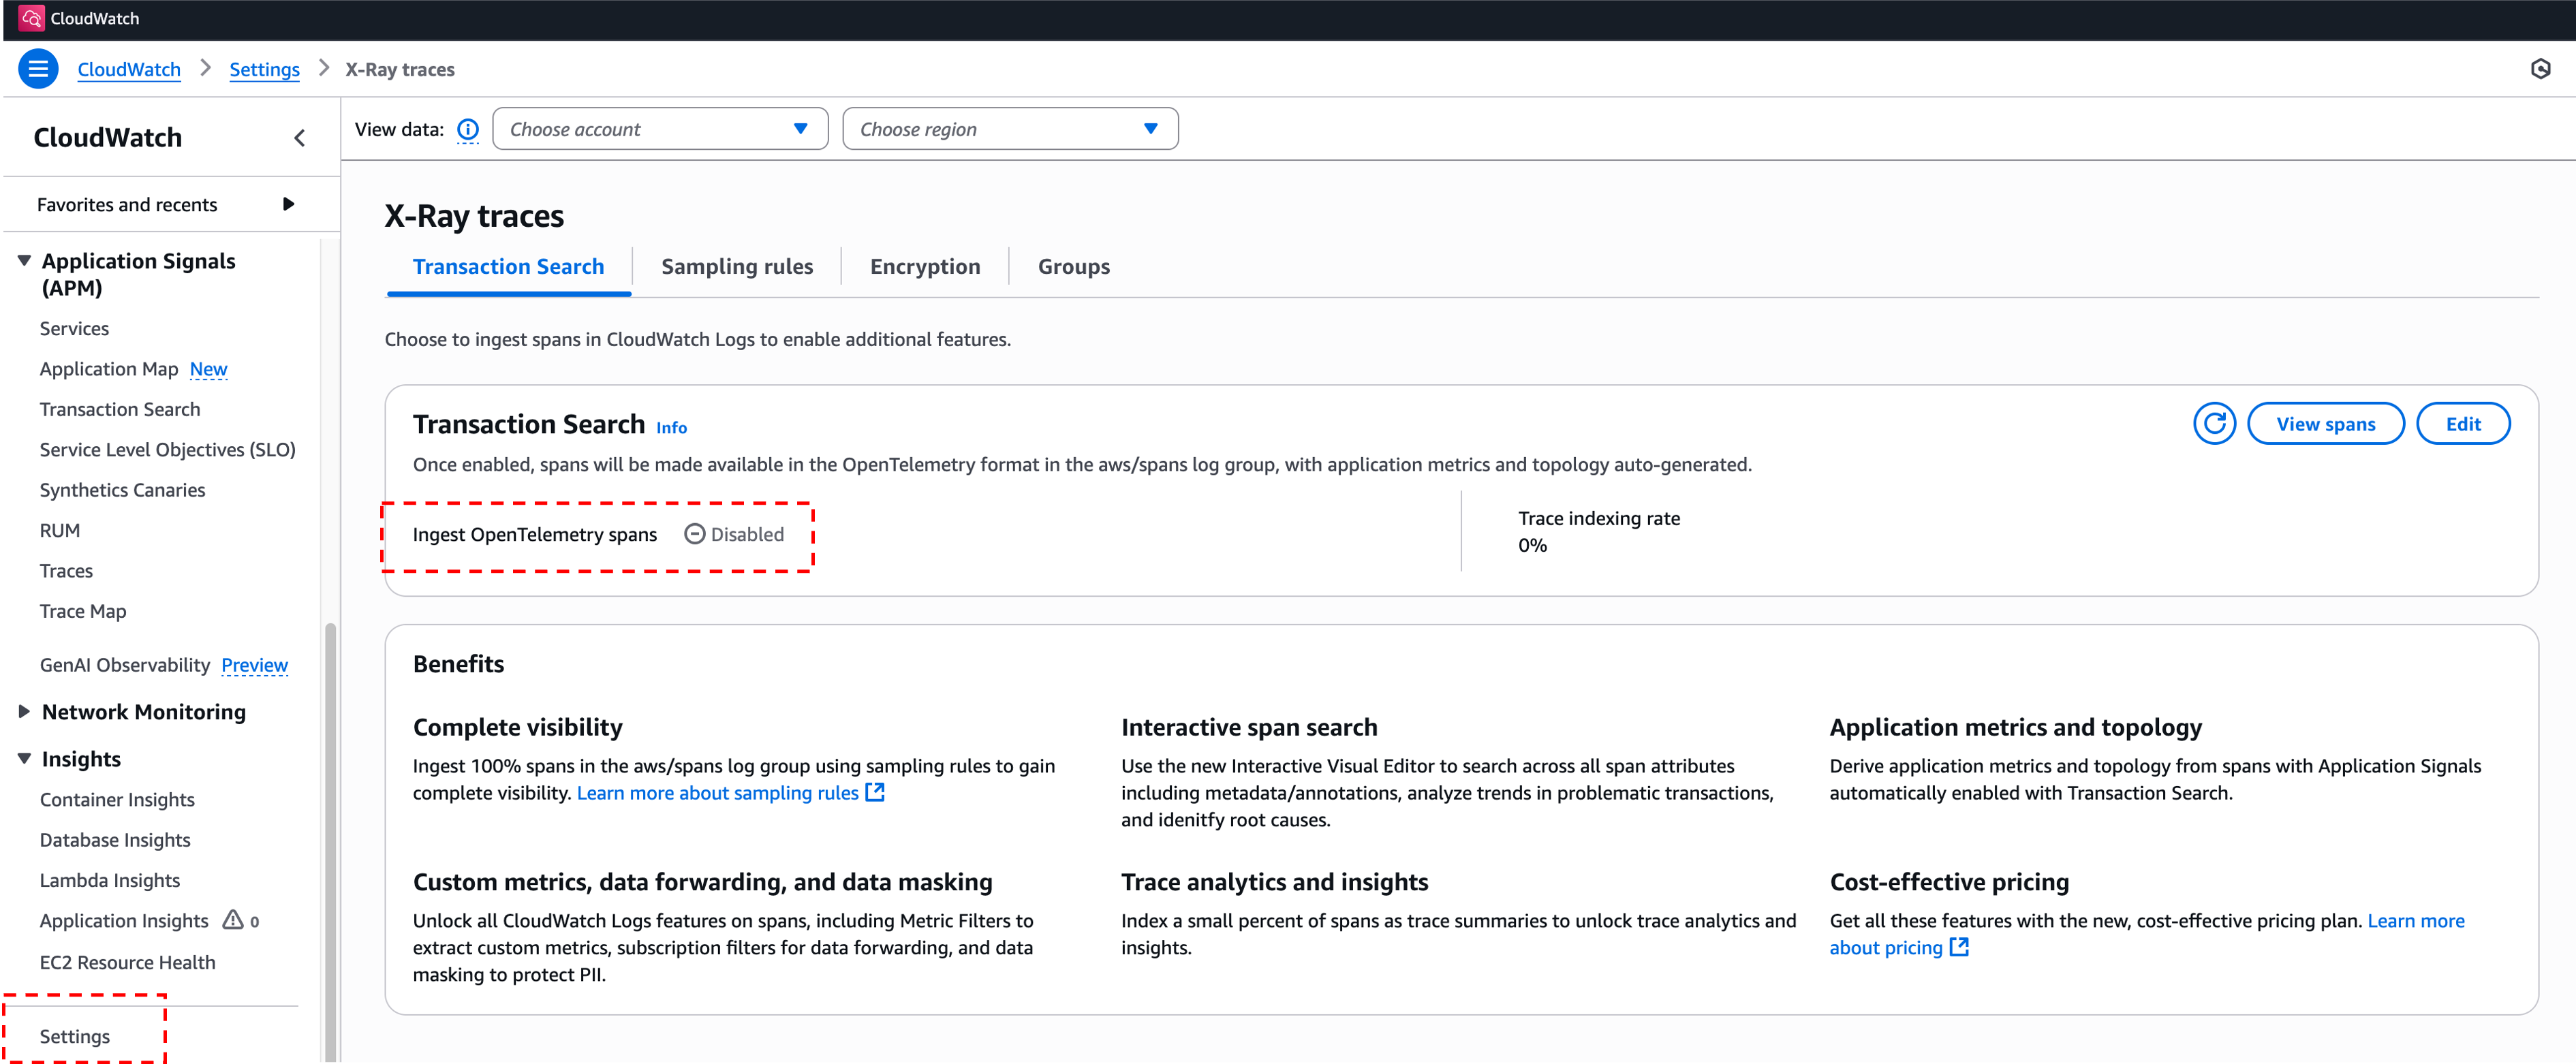


- After enabling Transaction Search:
  

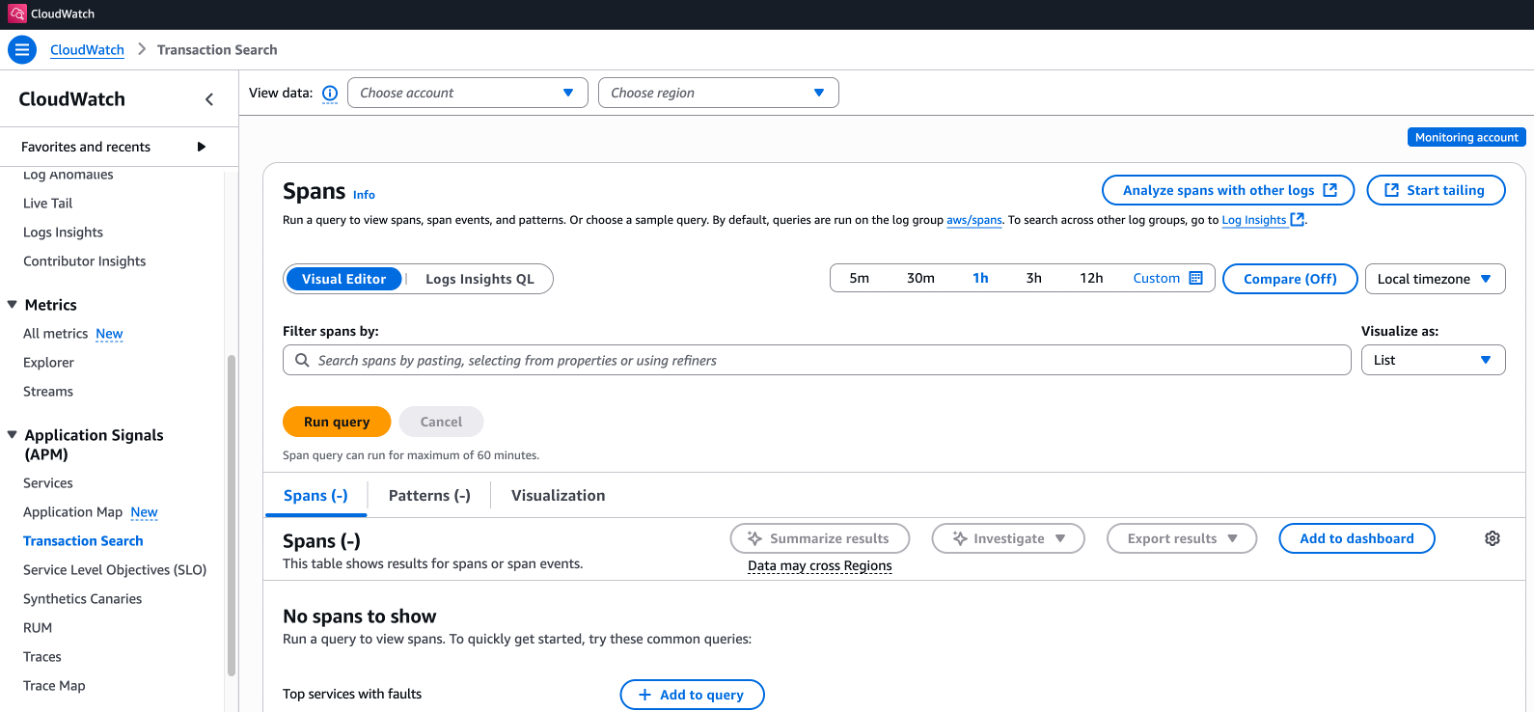


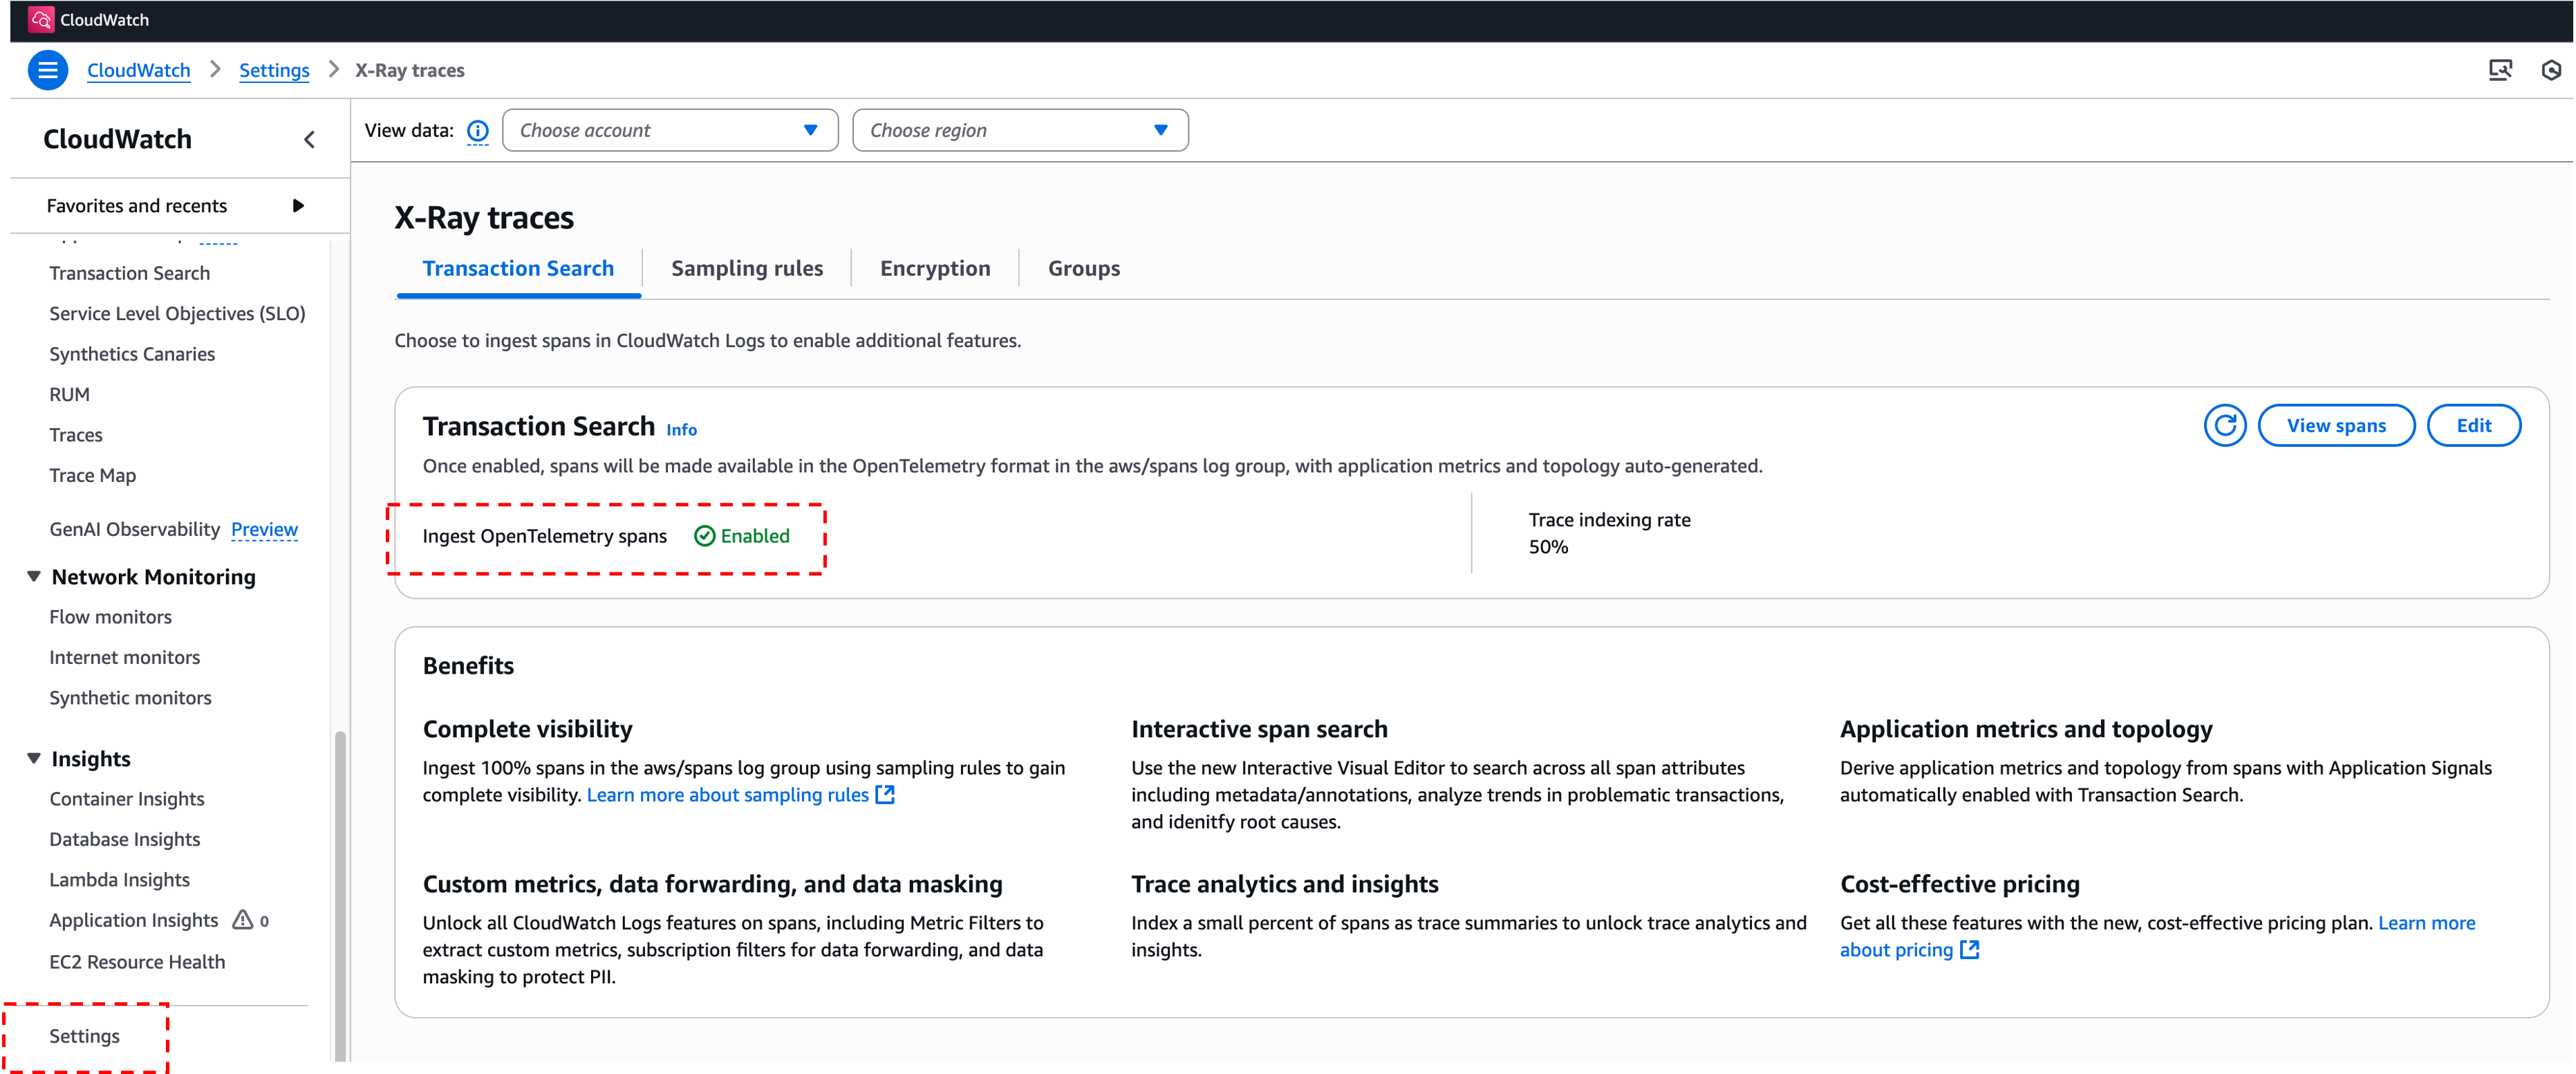





# 3. Conclusion

When you enable Transaction Search, you unlock multiple capabilities, including features in Application Signals and CloudWatch Logs. Spans sent to X-Ray are ingested in a log group called aws/spans. CloudWatch uses these spans to generate a curated application performance monitoring (APM) experience in CloudWatch Application Signals. This provides you the ability to search and analyze spans, as well as use CloudWatch Logs capabilities like outlier and pattern detection. You can even use custom metric extraction . CloudWatch Application Signals provides you with a unified, application-centric view of your applications, services, and dependencies. It also helps you monitor and triage application health.

This module covered how you can enable Trasaction Search using CloudFormation. Optionally, you can also enable Trasaction Search using console or API or CLI as per this [documentation](https://docs.aws.amazon.com/AmazonCloudWatch/latest/monitoring/Enable-TransactionSearch.html).


